# What Soccer Players Have The Highest Average Free Kick Accuracy?

This notebook and analysis is going to focus on answering the question "What Soccer players have the highest free kick accuracy?".

We will start the process by wrangling the data by reading the data from the provided source using pandas to run a SQL select statement, and the return of that select statement is then written to a pandas dataframe.

In [57]:
#import statements
import pandas as pd
import numpy as np
import sqlite3 as sq
import matplotlib.pyplot as plt

### Here we begin the data wrangling!
We start off with querying the SQLITE Db for all of the rows found in the player_api_id and player_name columns found in the Player table.

This query is then read by pandas, and then written as a dataframe under the variable name player_df.

Finally, we print off the first five results to verify it was successful using the head() method and then close the connection with the database.

In [58]:
# connect to the sqlite db, then perform a select staement and return the results of the statement into a Pandas Dataframe
connect = sq.connect("C:\Users\Marcus\Documents\GitHub\Investigating_Dataset_Soccer\Project-One\database.sqlite")
player_df = pd.read_sql_query("SELECT player_api_id, player_name FROM Player", connect)

# Make sure the query properly made a dataframe
print(player_df.head())
connect.close()

   player_api_id         player_name
0         505942  Aaron Appindangoye
1         155782     Aaron Cresswell
2         162549         Aaron Doran
3          30572       Aaron Galindo
4          23780        Aaron Hughes


### Checking how many rows you have is very important!

This step is crucial, as it allows us to have a reference point when we modify the data in the future, that way we can see how the changes effected the quantity of results from the original query.

In [59]:
#check how many results
len(player_df)

11060

### Knowing when and how to pull data from what sources is often difficult

At first, I thought using SQL to join the Player_Attributes and Player tables together would be the best way to go. However, after some consideration, I realized that adding the player_name field to the player_api_id before wrangling wasn't nessecary. As well, I also considered that using the .merge() method would allow for similar results and less time for me. Therefore I decided to pull the queries in as seperate variables. 

In [60]:
# connect to the sqlite db, then perform a select staement and return results of the statement into a Pandas Dataframe
connect = sq.connect("C:\Users\Marcus\Documents\GitHub\Investigating_Dataset_Soccer\Project-One\database.sqlite")
player_att_df = pd.read_sql_query("SELECT player_api_id, free_kick_accuracy, date FROM Player_Attributes", connect)

# Make sure the query properly made a dataframe
print(player_att_df.head())

connect.close()

   player_api_id  free_kick_accuracy                 date
0         505942                39.0  2016-02-18 00:00:00
1         505942                39.0  2015-11-19 00:00:00
2         505942                39.0  2015-09-21 00:00:00
3         505942                38.0  2015-03-20 00:00:00
4         505942                38.0  2007-02-22 00:00:00


#### Once again, always len() your rows before modifying your data. It can be an invaluble resource in the future.

In [61]:
#check how many results
len(player_att_df)

183978

### Now we make a function to easily group up data

This allows us to run groupby methods on this data in the future.

In [62]:
def groupby_acc(df):
    df1 = df.groupby('player_api_id')
    return (df1)

len(groupby_acc(player_att_df))

11060

#### Speaking of groupby methods...

Here we are essentially takings the len() of each group, and printing the results of that calculation in 
place of the original data. However, since we made a function, this doesn't actually change the underlying data. 
This is an extremely wonderful benefit of the function made earlier.

In [63]:
#We create a variable to run the .count method so we can easily refer to it in the future
def groupby_count(func):
    
    return func.count()

#Here we print out the return of the varible
groupby_count(groupby_acc(player_att_df))

,free_kick_accuracy,date
player_api_id,,
2625,14,14
2752,21,21
2768,21,21
2770,15,15
2790,5,5
2796,15,15
2802,22,22
2805,28,28
2857,16,16


#### I wonder why we took the count of each group... hmm.. guess we'll wait and see. Until then..
we're going to take the mean of each group, to find the average free kick accuracy across all games of each players career in our dataset on top of that, we're gonna take this and make it into a variable so we can use it as a base for methods in the future,

In [64]:
#We create a variable to run the .count method so we can easily refer to it in the future
def groupby_mean(func):
    
    return func.mean()

#Here we print out the return of the varible
groupby_mean(groupby_acc(player_att_df))

,free_kick_accuracy
player_api_id,
2625,49.928571
2752,18.857143
2768,20.047619
2770,68.666667
2790,55.400000
2796,18.733333
2802,75.681818
2805,57.142857
2857,69.375000


## Awesome!!

#### Now we have the data we need... hmm but something isn't right.. 

Oh Right! Lets order this data from highest percentage to lowest percentage, that way we can find the really high achievers.

In [65]:
groupby_mean(groupby_acc(player_att_df)).sort_values('free_kick_accuracy', ascending =False)

,free_kick_accuracy
player_api_id,
30731,90.488889
30612,90.071429
30684,89.315789
36011,87.880000
30851,87.800000
38398,87.666667
30743,87.280000
30878,87.218750
39854,86.681818


### 90% seems really high... I wonder how many games they played...

In [66]:
player_att_df.loc[player_att_df['player_api_id'] == 30731]


,player_api_id,free_kick_accuracy,date
11974,30731,93.0,2016-06-09 00:00:00
11975,30731,93.0,2016-01-28 00:00:00
11976,30731,93.0,2015-10-09 00:00:00
11977,30731,93.0,2015-10-02 00:00:00
11978,30731,93.0,2015-09-25 00:00:00
11979,30731,93.0,2015-09-21 00:00:00
11980,30731,93.0,2015-08-14 00:00:00
11981,30731,93.0,2015-07-31 00:00:00
11982,30731,93.0,2015-07-24 00:00:00
11983,30731,93.0,2015-07-16 00:00:00


### Well this one looks good.. but lets see if there is anything we can use to clean up the data
After a hard look, it look like there is a NaN value..

### This is further proof that there is definitely multiple NaN/Null/NA values we need to remove!

In [67]:
#We make a variable that finds the standard deviatian of all groups after being grouped up by player_id
groupby_count(groupby_acc(player_att_df)).std(ddof=0)

free_kick_accuracy    9.361219
date                  9.395214
dtype: float64

In [68]:
#We now take the mean count of free_kick_accuracy after the data is grouped by player
groupby_count(groupby_acc(player_att_df)).mean()

free_kick_accuracy    16.558951
date                  16.634539
dtype: float64

## Lets remove any entry that has a NaN/NA/Null value in the data.

In [69]:
len(player_att_df)
#Just a reminder of the amount of values in this dataframe

183978

In [70]:
#We create a new variable that stores the new dataframe we make after dropping all nulls/NaN/NA values.
player_att_dfdna = player_att_df.dropna()
#We see that the data here did change
len(player_att_dfdna)

183142

### Now we're going to use a histagram to find if there are any outliers in the lower end of the spectrum
this is because we do not want players who would play a very small sample size of games if they are outliers.

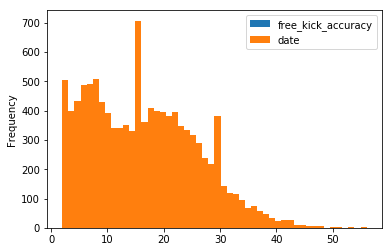

In [71]:
groupby_count(groupby_acc(player_att_dfdna)).plot.hist('free_kick_accuracy', bins=50)

### It seems that there are no outliers on the lower end of the bracket! 
This makes our job much easier, so lets go ahead now and find the top performing free kickers in soccer!
We'll use the groupby_mean function to sort the players based on their average free kick accuracy first.

In [72]:
groupby_mean(groupby_acc(player_att_dfdna)).sort_values('free_kick_accuracy', ascending =False)

,free_kick_accuracy
player_api_id,
30731,90.488889
30612,90.071429
30684,89.315789
36011,87.880000
30851,87.800000
38398,87.666667
30743,87.280000
30878,87.218750
39854,86.681818


#### Now we're going to plot this to help visualize the entire spectrum of players!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E213548>]],
      dtype=object)

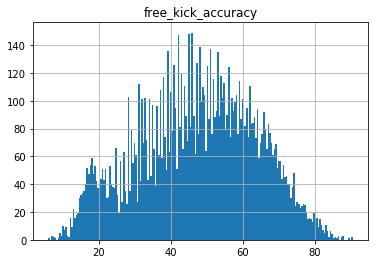

In [73]:
groupby_mean(groupby_acc(player_att_dfdna)).sort_values('free_kick_accuracy', ascending =False).hist('free_kick_accuracy', bins=200)

### WOW! The elite players really are elite, there's so few above 80%. 
Lets just choose the top 10 performers though. We really only want the best of the best!

In [74]:
groupby_mean(groupby_acc(player_att_dfdna)).sort_values('free_kick_accuracy', ascending =False).head(10)

,free_kick_accuracy
player_api_id,
30731,90.488889
30612,90.071429
30684,89.315789
36011,87.880000
30851,87.800000
38398,87.666667
30743,87.280000
30878,87.218750
39854,86.681818


### Hmm.. I think we need to merge this list with the matching player names in the player_df table.
First lets make this it's own dataframe, that way we don't need to merge the original one!

In [75]:
top_10_ids = groupby_mean(groupby_acc(player_att_dfdna)).sort_values('free_kick_accuracy', ascending =False).head(10)

In [76]:
top_10 = top_10_ids.merge(player_df, how='inner', on='player_api_id')

top_10

,player_api_id,free_kick_accuracy,player_name
0,30731,90.488889,Andrea Pirlo
1,30612,90.071429,David Beckham
2,30684,89.315789,"Juninho Pernambucano,20"
3,36011,87.880000,Sejad Salihovic
4,30851,87.800000,Shunsuke Nakamura
5,38398,87.666667,Juan Arango
6,30743,87.280000,Ronaldinho
7,30878,87.218750,Wesley Sneijder
8,39854,86.681818,Xavi Hernandez
9,41694,86.571429,Francesco Lodi


## Finally!! We have our top 10 players! It looks exactly as expected with extreme star talent at the top!
before we go, lets see how many games each of these players played.

In [77]:
count = groupby_count(groupby_acc(player_att_df))

top_10_count = top_10.merge(count, how='inner', on='player_api_id')

top_10_count

,player_api_id,free_kick_accuracy_x,player_name,free_kick_accuracy_y,date
0,30731,90.488889,Andrea Pirlo,45,46
1,30612,90.071429,David Beckham,14,14
2,30684,89.315789,"Juninho Pernambucano,20",19,19
3,36011,87.880000,Sejad Salihovic,25,25
4,30851,87.800000,Shunsuke Nakamura,5,5
5,38398,87.666667,Juan Arango,30,30
6,30743,87.280000,Ronaldinho,25,25
7,30878,87.218750,Wesley Sneijder,32,32
8,39854,86.681818,Xavi Hernandez,22,22
9,41694,86.571429,Francesco Lodi,35,35


### Last but not least, lets clean this data up just a bit.

In [78]:
#Here we rename a few of the columns to better represent the data they store.
top_10_count.rename(columns={'free_kick_accuracy_x':'free_kick_accuracy',
                          'free_kick_accuracy_y':'free_kick_accuracy_count'}, 
                 inplace=True)

In [79]:
#Print out of the changes.
top_10_count

,player_api_id,free_kick_accuracy,player_name,free_kick_accuracy_count,date
0,30731,90.488889,Andrea Pirlo,45,46
1,30612,90.071429,David Beckham,14,14
2,30684,89.315789,"Juninho Pernambucano,20",19,19
3,36011,87.880000,Sejad Salihovic,25,25
4,30851,87.800000,Shunsuke Nakamura,5,5
5,38398,87.666667,Juan Arango,30,30
6,30743,87.280000,Ronaldinho,25,25
7,30878,87.218750,Wesley Sneijder,32,32
8,39854,86.681818,Xavi Hernandez,22,22
9,41694,86.571429,Francesco Lodi,35,35


In [80]:
#We'll drop the date column as we don't need a count of the date.
top_10_count.drop('date', axis=1)

,player_api_id,free_kick_accuracy,player_name,free_kick_accuracy_count
0,30731,90.488889,Andrea Pirlo,45
1,30612,90.071429,David Beckham,14
2,30684,89.315789,"Juninho Pernambucano,20",19
3,36011,87.880000,Sejad Salihovic,25
4,30851,87.800000,Shunsuke Nakamura,5
5,38398,87.666667,Juan Arango,30
6,30743,87.280000,Ronaldinho,25
7,30878,87.218750,Wesley Sneijder,32
8,39854,86.681818,Xavi Hernandez,22
9,41694,86.571429,Francesco Lodi,35


## Awesome!! And here we have a final list of the top ten players by free_kick_accuracy!

# RESOURCES:

For help / coding:

https://pandas.pydata.org/pandas-docs/stable/user_guide/

https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot

https://www.geeksforgeeks.org/passing-function-as-an-argument-in-python/\

https://www.programiz.com/python-programming/closure

https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe

https://www.geeksforgeeks.org/python-pandas-dataframe-loc/

https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/

https://www.geeksforgeeks.org/python-pandas-dataframe-series-head-method/

Dataset:

https://www.kaggle.com/hugomathien/soccer